In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

data = pd.read_csv("Dataset/vox1_meta.csv", delimiter = '\t', index_col = "VoxCeleb1 ID")

data.head()

,VGGFace1 ID,Gender,Nationality,Set
VoxCeleb1 ID,,,,
id10001,A.J._Buckley,m,Ireland,dev
id10002,A.R._Rahman,m,India,dev
id10003,Aamir_Khan,m,India,dev
id10004,Aaron_Tveit,m,USA,dev
id10005,Aaron_Yoo,m,USA,dev


Text(0.5, 1.0, 'Number of Individuals per Country')

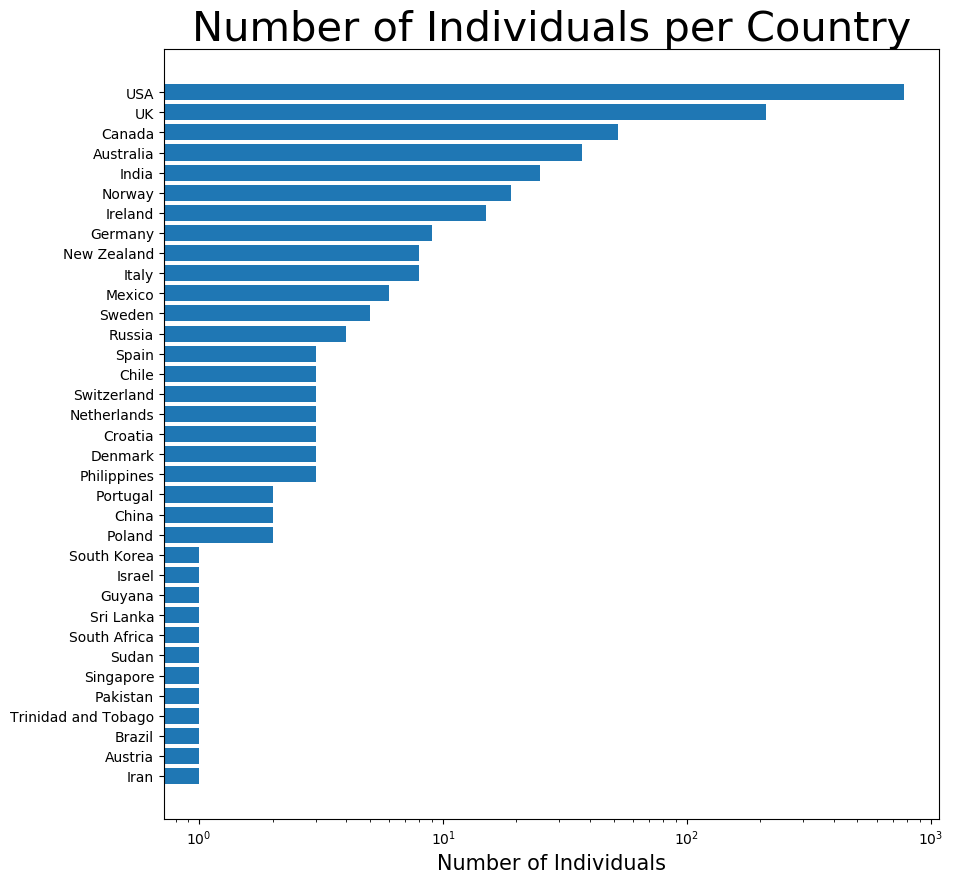

In [169]:
nationalities = data.loc[(data.Set == 'dev')].groupby('Nationality').agg('count')['VGGFace1 ID'].sort_values()
nationalities_test = data.loc[(data.Set == 'test')].groupby('Nationality').agg('count')['VGGFace1 ID'].sort_values()

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,10))


ax.barh(nationalities.keys(), nationalities.values, log=True, align='center')
plt.yticks(size=10)
ax.set_xlabel('Number of Individuals', size=15)
ax.set_title('Number of Individuals per Country', size=30)

In [178]:
dev_loc = "Dataset\\vox1_dev_wav\\vox1_dev_wav\\wav"
test_loc = "Dataset\\wav"

In [176]:
data['Num_Samples'] = 0

for index in data.index:
    dev_path = os.path.join(dev_loc, index)
    test_path = os.path.join(test_loc, index)
    if os.path.exists(dev_path):
        data.at[index, 'Num_Samples'] += sum(len(files) for _, _, files in os.walk(dev_path))
    if os.path.exists(test_path):
        data.at[index, 'Num_Samples'] += sum(len(files) for _, _, files in os.walk(test_path))

data.head()

,VGGFace1 ID,Gender,Nationality,Set,Num_Samples
VoxCeleb1 ID,,,,,
id10001,A.J._Buckley,m,Ireland,dev,77
id10002,A.R._Rahman,m,India,dev,131
id10003,Aamir_Khan,m,India,dev,171
id10004,Aaron_Tveit,m,USA,dev,108
id10005,Aaron_Yoo,m,USA,dev,59


Text(0.5, 1.0, 'Number of Utterances per Country')

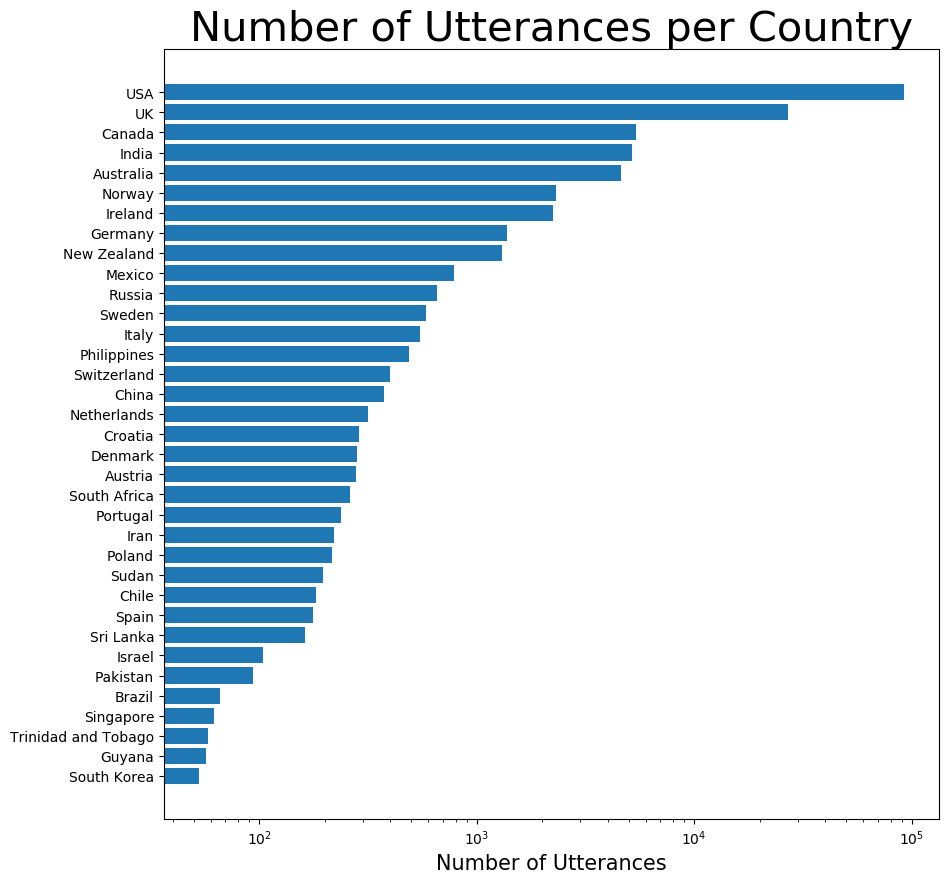

In [179]:
nationalities = data.loc[(data.Set == 'dev')].groupby('Nationality').agg('sum')['Num_Samples'].sort_values()
nationalities_test = data.loc[(data.Set == 'test')].groupby('Nationality').agg('sum')['Num_Samples'].sort_values()

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,10))


ax.barh(nationalities.keys(), nationalities.values, log=True, align='center')
plt.yticks(size=10)
ax.set_xlabel('Number of Utterances', size=15)
ax.set_title('Number of Utterances per Country', size=30)